### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 27th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy
import random

############ Question 1(a)############
#  $\int_{-\infty}^{\infty} e^{\frac{-x^{2}}{2\sigma^{2}}}$ = 1


# $\frac{1}{\sqrt{2 \pi}\sigma}$ $\int_{0}^{\infty} e^{-\frac{x^{2}}{4\sigma^{2}}}$ = 1

############## Question 1(b)###################

# $\int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 $
# if $\omega$ = $\frac{x}{\sigma \sqrt{2}}$ , d$\omega$ = $\frac{1}{\sqrt{2}\sigma} dx$ you get....
# $\int_{0}^{\infty} \omega^{3} e^{-\omega^{2}} d\omega$
# $\frac{2\sigma^{4}}{\sqrt{2\pi}}$ $\int_{0}^{\infty} \omega^{3} e^{-\omega^{2}/2} d\omega$

In [12]:
##########1(c)############

N = int(1e5) #Samples
sigma = 3 #STD
dist = scipy.stats.norm(loc=0,scale=sigma) #Sets norm function
distR = dist.rvs(N) #Random values in a normal collection method
data = distR[distR>0] # Only take random values greater than zero
distP = dist.pdf(data) # PDF "Similar to our gaussian" 

mont = lambda x: x**3/np.sqrt(2) * dist.pdf(x) # Monte Carlo function that will be summed
Int = mont(x=data).sum() / len(data) #Gets Monte Carlo datums and adds them all and divied by total datums for complete integration
Output = Int * 2 * sigma**4 # Multiply integral result by factors for completion
print(Output)

164.56209713624094


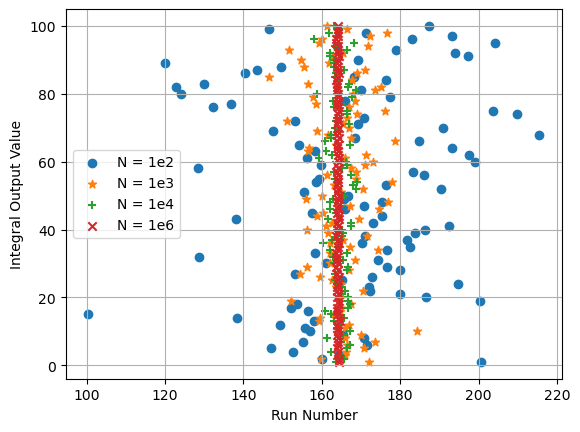

In [31]:
#########1(d)##############
N = np.array([1e2,1e3,1e4,1e6]).astype(int)
sigma = 3 #STD
dist = scipy.stats.norm(loc=0,scale=sigma) #Sets norm function
mont = lambda x: x**3/np.sqrt(2) * dist.pdf(x) # Monte Carlo function that will be summed
point = []
Points = []
for n in N:
    for i in range(100):
        distR = dist.rvs(n) #Random values in a normal collection method
        data = distR[distR>0] # Only take random values greater than zero
        distP = dist.pdf(data) # PDF "Similar to our gaussian" 
        Int = mont(x=data).sum() / len(data) #Monte Carlo Integrate
        Output = Int * 2 * sigma**4 #Multiply by factors
        point.append(Output) # Record output
    Points.append(np.array(point)) #Record all outputs for value N
    point = []
    
xline = np.linspace(1,100,100)
plt.scatter(Points[0],xline,label='N = 1e2')
plt.scatter(Points[1],xline,marker='*',label='N = 1e3')
plt.scatter(Points[2],xline,marker='+',label='N = 1e4')
plt.scatter(Points[3],xline,marker='x',label='N = 1e6')
plt.ylabel('Integral Output Value')
plt.xlabel('Run Number')
plt.grid()
plt.legend()
#The more samples you have the more accurate points you get


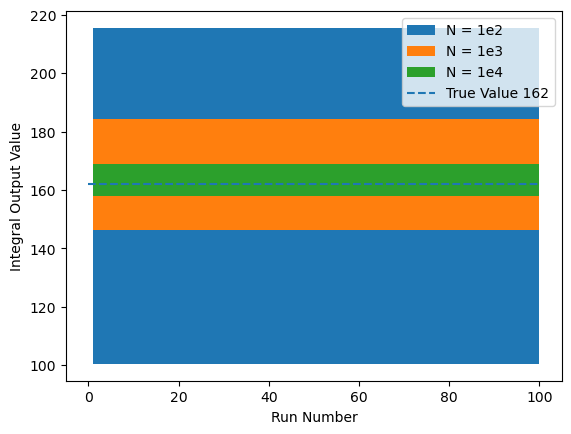

In [53]:
# Make a plot that shows log10(N) along the x-axis and the spread between the maximum and minimum 
# Monte Carlo integral values that you get at each on the axis. (Note: matplotlib's fill_between command is useful for this). 
# Plot a horizontal line on the same figure to show the precise mathematical value. 
# You should see that Monte Carlo integration results in less numerical spread as gets larger.

min2,max2 = Points[0].min(), Points[0].max() #Min and Max point at 1e2
x2 = [1e2] * len(Points[0])
min3,max3 = Points[1].min(), Points[1].max() #Min and Max point at 1e3
x3 = [1e3] * len(Points[0])
min4,max4 = Points[2].min(), Points[2].max() #Min and Max point at 1e4

plt.fill_between(xline,min2,max2,label='N = 1e2')
plt.fill_between(xline,min3,max3,label='N = 1e3')
plt.fill_between(xline,min4,max4,label='N = 1e4')
plt.hlines(162,xmin=0,xmax=100,label='True Value 162',ls='--')
plt.ylabel('Integral Output Value')
plt.xlabel('Run Number')
plt.legend()

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

An IQ of :  27 the pdf has a value of:  5.943737571971505e-12 

An IQ of :  167 the pdf has a value of:  5.960031807224472e-12 

An IQ of :  98 the pdf has a value of:  5.951995627530414e-12 

An IQ of :  104 the pdf has a value of:  5.952694005090479e-12 

An IQ of :  80 the pdf has a value of:  5.949900975360821e-12 

An IQ of :  0 the pdf has a value of:  5.940600124901435e-12 

An IQ of :  74 the pdf has a value of:  5.949202918111237e-12 

An IQ of :  176 the pdf has a value of:  5.961080786177884e-12 

An IQ of :  126 the pdf has a value of:  5.955255408179048e-12 

An IQ of :  175 the pdf has a value of:  5.960964224049442e-12 

An IQ of :  145 the pdf has a value of:  5.957468396005603e-12 



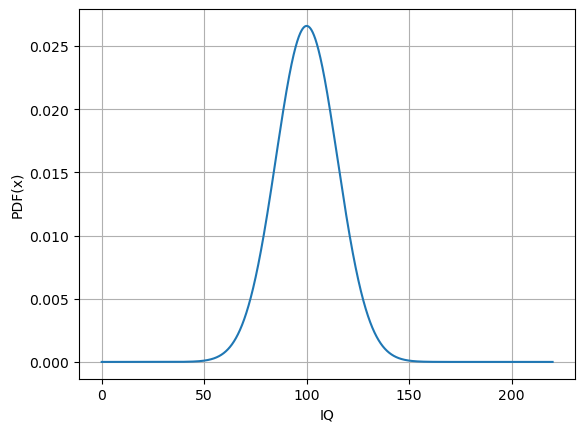

In [276]:
### Solution 1(a)
xo = 0 #Initial point
xf = 220 #Final point
N = int(5e6)
dist = stats.norm(loc=100,scale=15) #Distribution
xgrid = np.linspace(start=xo,stop=xf,num=N) #Number line? lol
distP = dist.pdf(xgrid) #PDF
rand_vals = np.random.randint(xo,xf,11) # 11 random draws
rand_vals[10] = 145 #Makes last draw have value of 145
for vals in rand_vals:
    print('An IQ of : ',vals,'the pdf has a value of: ', distP[vals],'\n')
    
plt.plot(xgrid,distP) #Plot of distribution
plt.grid()
plt.xlabel('IQ')
plt.ylabel('PDF(x)')
plt.show()

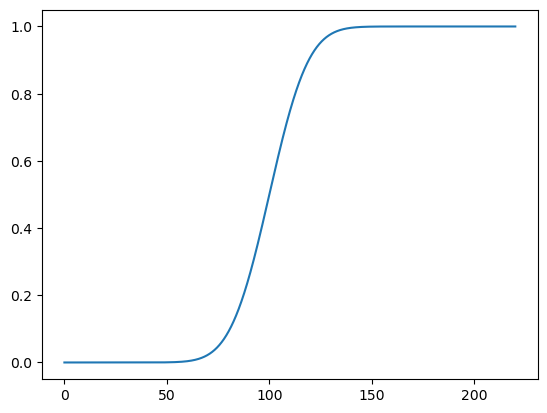

In [277]:
#######Question 1(b)####
# Access the cdf property of the Gaussian object and plot it over the same -range as in (1) but in a different figure.
# Access the ppf property (percent point function) and use inverse transform sampling of the cdf to draw random samples
# and make a histogram of these. Overplot the pdf from (1). These should match.
import scipy
xgrid = np.linspace(start=xo,stop=xf,num=N) #Number line? lol
distC = dist.cdf(xgrid) #CDF
plt.plot(xgrid,distC)

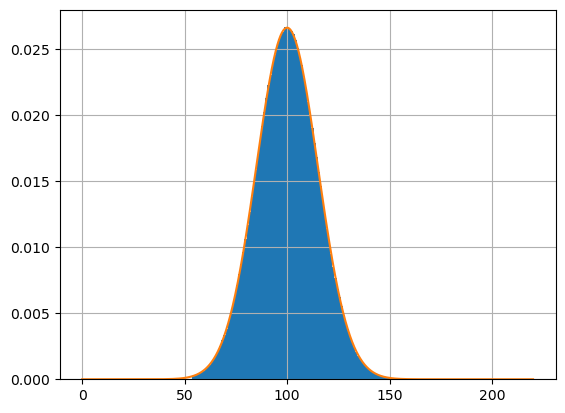

In [278]:
inv_distC = scipy.interpolate.interp1d(distC,xgrid) # Interpolate CDF for histogram
u = np.random.uniform(0.001, 0.9999, N) #Random Normal distribution
plt.hist(inv_distC(u),bins=100,density=True)
plt.plot(xgrid,distP)
plt.grid()
#It matches!!

In [279]:
#######Question 1(c)####
# What fraction of people have IQ > 145? 
# Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, 
# or perform a calculation involving the cdf.

inds = np.where(xgrid>145)[0] #Mask for only index values above 145
data = distC[inds] # View CDF for values greater than 145 IQ
p_145 = 1 - data[0] #Find probability
p_145

0.001349896554347696

# Roughly 0.135 percent of people have an IQ over 145

In [284]:
# What IQ corresponds to "one in a million"?
# We have 5 million data points, it is likely that we have 5 "One in a million" scores out of the samples.
# Simply looking at the cumulative plot at the top 0.000001% tells me where the 1 in a million spot it
ind = np.where(distC>=0.999999)[0][0] #Find values above 1e-6
xgrid[ind] #Plot value closest to 1e-6

171.30140626028125

# A IQ score of about 171 is a 1 in a million IQ

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

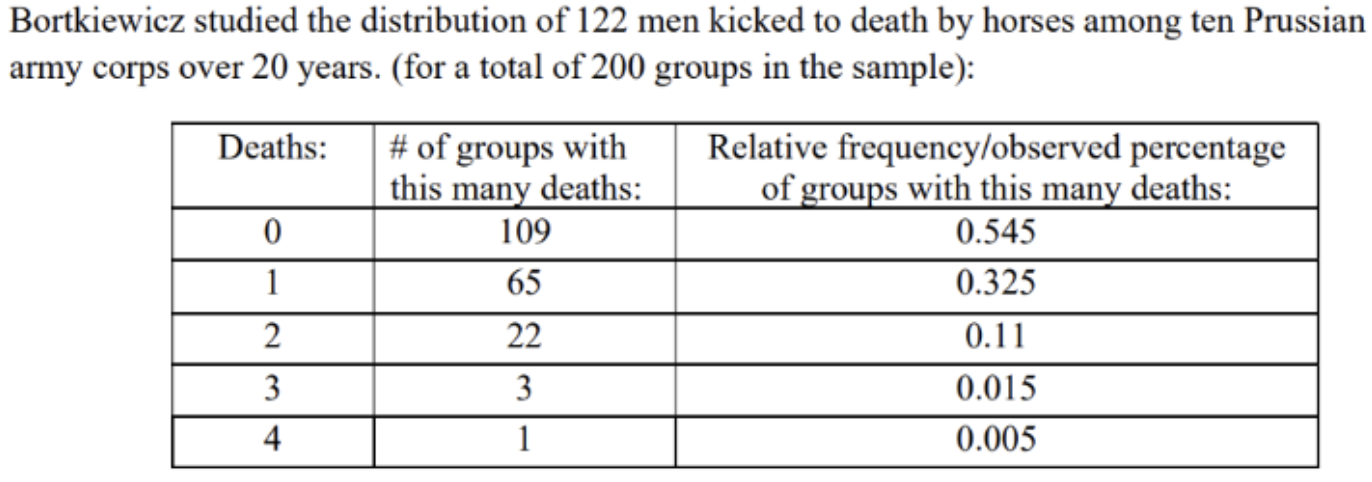

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

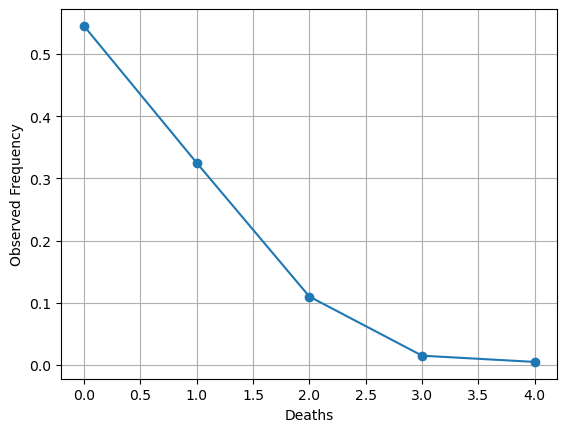

In [288]:
deaths = np.linspace(0,4,5)
g_death = np.array([0.545,0.325,0.11,0.015,0.005])
plt.plot(deaths,g_death,marker='o')
plt.xlabel('Deaths')
plt.ylabel('Observed Frequency')
plt.grid()

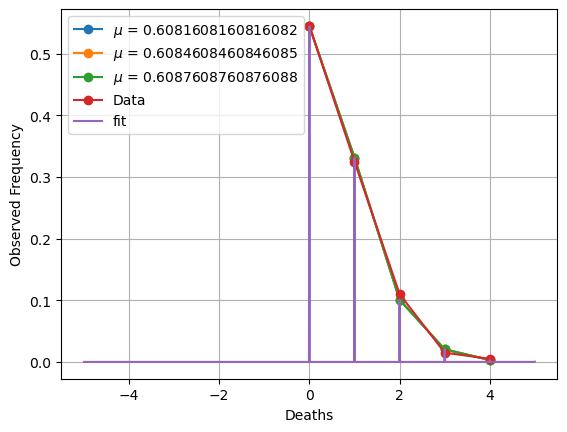

In [598]:
# Plot a few Poisson distributions on top that are characterized by different 
# values that might be reasonable guesses for how the data is distributed.

mus = np.linspace(0,3,10000) #Different mu values 
ncheck = 1 #varience value for fitting
Vals = [] # Will hold pmf outputs
distPs = [] # Will hold accepted, weighted pmf values
Mu = [] #Will record all "good" mu values 
for mu in mus:
        Vals = scipy.stats.poisson.pmf(deaths,mu=mu) # Probability mass function
        if Vals.sum() > 0:
            Vals = Vals / Vals.sum() # weight values for pmf
            check = ((Vals - g_death)**2).sum() # See differnece between values
            if check < ncheck: #If the difference is lower than lowest difference, record values
                ncheck = np.copy(check)
                distPs.append(Vals)
                Mu.append(mu)

xgrid = np.linspace(-5,5,1001)
fit = scipy.stats.poisson.pmf(xgrid,mu=Mu[-1]) #Fit best mu values  with a function with more than 5 data points
for ind in range(len(Mu)):
    if ind >= len(Mu) - 3: #Only plot 3 best data points
        plt.plot(deaths,distPs[ind],marker='o',label=f'$\mu$ = {Mu[ind]}')
        
plt.plot(deaths,g_death,marker='o',label='Data')
plt.plot(xgrid,fit,label='fit')
plt.legend()
plt.xlabel('Deaths')
plt.ylabel('Observed Frequency')
plt.grid()

In [508]:
scipy.stats.poisson(mu=Mu[-1]).

Deaths,Observers
float64,float64
0.0,145.8703230409545
0.009999999999999787,0.0
0.020000000000000462,0.0
0.03000000000000025,0.0
0.040000000000000036,0.0
0.04999999999999982,0.0
0.0600000000000005,0.0
0.07000000000000028,0.0
0.08000000000000007,0.0


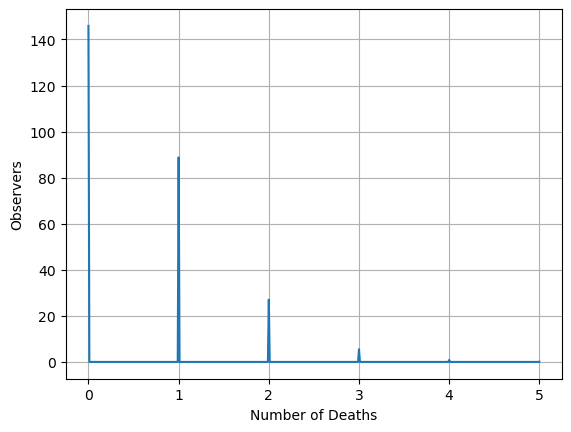

In [679]:
# We'll come to model fitting next week, but for now use the descriptive sample statistics 
# that you can calculate from this data to deduce the mu
# of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. 
# Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, 
# since these are tabulated densities, not samples.

# Plot the Poisson distribution with the 
# found in (3) alongside the data.

#This is just simple plotting and tabulating
from astropy.table.table import Table
tppl = (122 / (1-0.545))

ppl_fit = (fit * tppl)
xgrid = np.linspace(-5,5,1001)
plt.plot(xgrid[500:],ppl_fit[500:])
plt.xlabel('Number of Deaths')
plt.ylabel('Observers')
plt.grid()
tab = Table([xgrid[500:],ppl_fit[500:]],names=('Deaths','Observers'))
tab